In [6]:
import numpy as np
import pandas as pd
from wombat.models import dbsession, engine
from wombat.models import Item, RentalItem, Rental
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

# res = find_by_item_type("dresses")
query = "SELECT I.id, I.brand, I.item_type, I.cost, I.sku, \
    I.rent_per_week, I.created_at, I.title, I.description, \
    I.year_purchased, R.rental_date, R.return_date, \
    RI.item_price, RI.refunded, RI.fit_return \
    FROM items I \
    LEFT JOIN rental_items RI ON I.id = RI.item_id \
    LEFT JOIN rentals R ON R.id = RI.rental_id;"
query = "SELECT I.id, I.brand, I.item_type, I.cost, I.sku, \
    I.rent_per_week, I.created_at, I.title, I.description, \
    I.year_purchased, R.rental_date, R.return_date, \
    RI.item_price, RI.refunded, RI.fit_return \
    FROM items I \
    LEFT JOIN rental_items RI ON I.id = RI.item_id \
    LEFT JOIN rentals R ON R.id = RI.rental_id;"
query = """SELECT * FROM items I;"""
df = pd.read_sql_query(query, engine)
print(df.shape)
df = df.loc[df['title'] != 'LENDER SUBMISSION FILL IN']

(6268, 45)


In [7]:
query = "SELECT DISTINCT item_id FROM rental_items;"
ri = pd.read_sql_query(query, engine)
ri.shape

(885, 1)

In [8]:
temp = df['item_price']
temp = temp.dropna()
y = temp.values
x = temp.index.values
plt.plot(x, y)

KeyError: 'item_price'

KeyError: 'item_price'

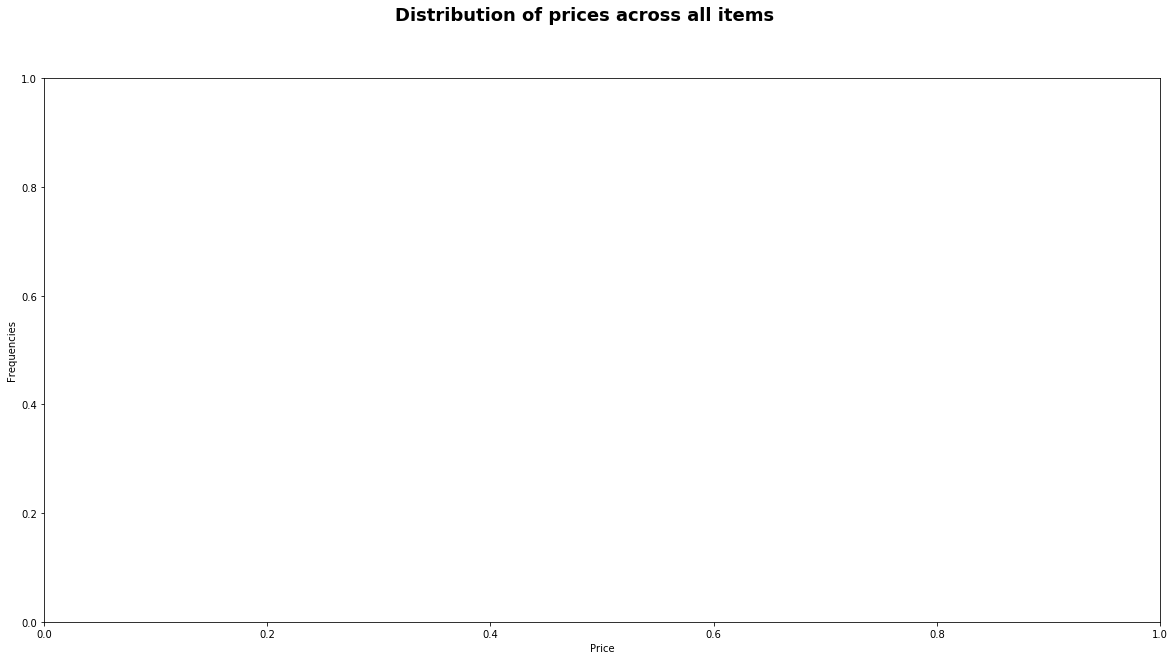

In [3]:
fig = plt.figure()
fig.suptitle('Distribution of prices across all items', fontsize=18, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_xlabel('Price')
ax.set_ylabel('Frequencies')

d_vals = df['item_price'].dropna().values
#print(d_vals)
#d.sort_values().head()
#y = d.index.values
#x = d.values
#plt.plot(x, y)
binwidth = 5
mn = np.min(d_vals).astype(int)
mx = np.max(d_vals).astype(int)
bins = list(range(mn, mx+binwidth, binwidth))
ax.hist(d_vals, bins)

KeyError: False

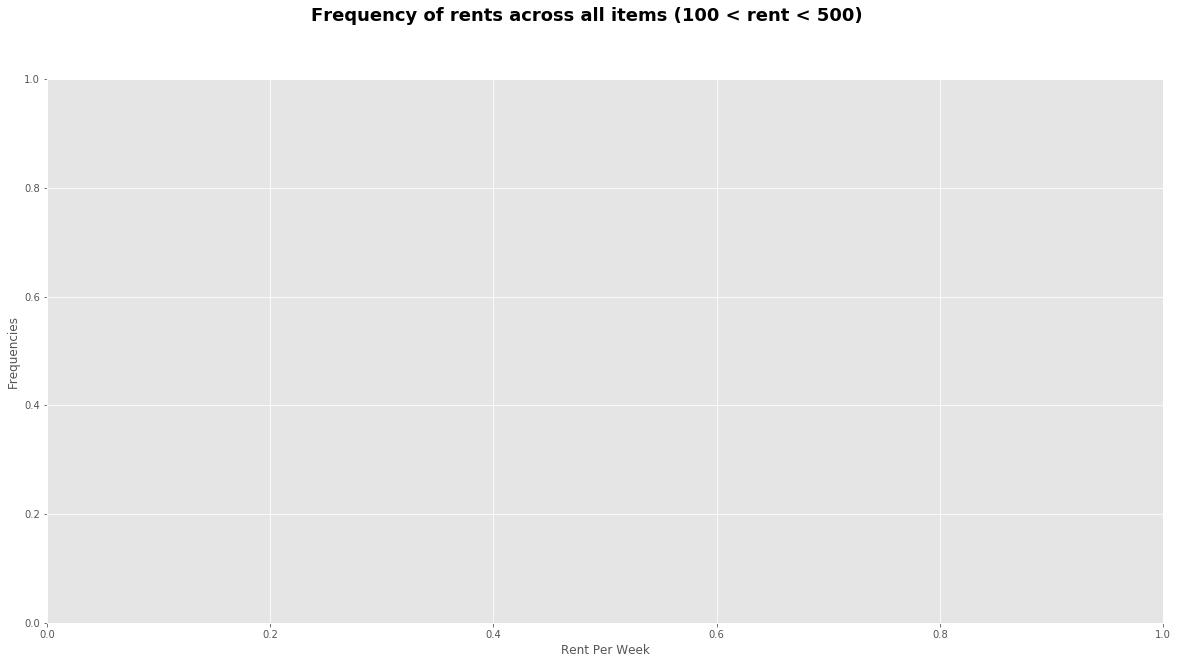

In [53]:
fig = plt.figure()
fig.suptitle('Frequency of rents across all items (100 < rent < 500)', fontsize=18, fontweight='bold')

ax = fig.add_subplot(111)
#fig.subplots_adjust(top=0.85)
ax.set_xlabel('Rent Per Week')
ax.set_ylabel('Frequencies')

binwidth = 10

#plt.hist(vals, bins=bins)
df_dresses = df[df['item_type' == 'dresses']]
df_upper = df.loc[df['rent_per_week'] > 500]
df_lower = df.loc[df['rent_per_week'] < 500]
df_middle = df.loc[(df['rent_per_week'] < 500) & (df['rent_per_week'] > 100)]
vals = df_middle['rent_per_week'].values
mn = np.min(vals).astype(int)
mx = np.max(vals).astype(int)
bins = list(range(mn, mx+binwidth, binwidth))
ax.hist(vals, bins=bins)

In [ ]:
df_costs = df['cost'].dropna()
df_costs.shape

In [ ]:
fig = plt.figure()
fig.suptitle('Frequency of prices across all items', fontsize=18, fontweight='bold')

ax = fig.add_subplot(111)
#fig.subplots_adjust(top=0.85)
ax.set_xlabel('Price')
ax.set_ylabel('Frequencies')

vals = df['rent_per_week'].dropna().values
binwidth = 5
mn = np.min(vals).astype(int)
mx = np.max(vals).astype(int)
bins = list(range(mn, mx+binwidth, binwidth))
ax.hist(vals, bins=bins)

In [3]:
rents = df['rent_per_week'].dropna().values.astype(int)
rents

array([     56,      60,     140, ..., 1000000, 1000000, 1000000])

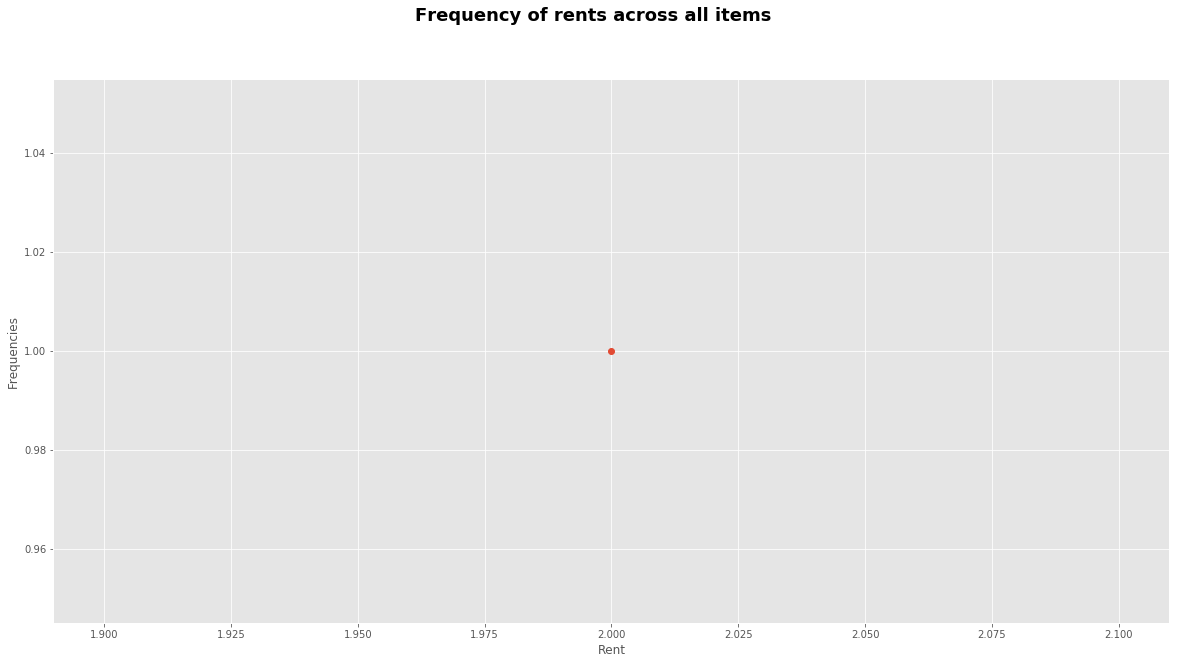

In [5]:
vals = df['rent_per_week'].dropna().values.astype(int)
binwidth = 5
mn = np.min(vals).astype(int)
mx = np.max(vals).astype(int)
bins = list(range(mn, mx+binwidth, binwidth))
#ax.hist(vals, bins=bins)
fig = plt.figure()
fig.suptitle('Frequency of rents across all items', fontsize=18, fontweight='bold')

ax = fig.add_subplot(111)
#fig.subplots_adjust(top=0.85)
ax.set_xlabel('Rent')
ax.set_ylabel('Frequencies')

ax.plot([2], [1], 'o')

In [ ]:
d = df['rent_per_week'].value_counts()
y = d.index.values
x = d.values
plt.plot(x, y)

In [56]:
print(df.shape)
df = df.loc[df['title'] != 'LENDER SUBMISSION FILL IN']
print(df.shape)
d_lower = df.loc[(df['rent_per_week'] < 3000)]
d_upper = df.loc[df['rent_per_week'] > 3000]

(6887, 15)
(6887, 15)


In [58]:
d_upper['rent_per_week'].value_counts()
d = d_upper.loc[d_upper['title'] != 'LENDER SUBMISSION FILL IN']
d_lower.shape

(6885, 15)

AttributeError: 'Series' object has no attribute 'columns'

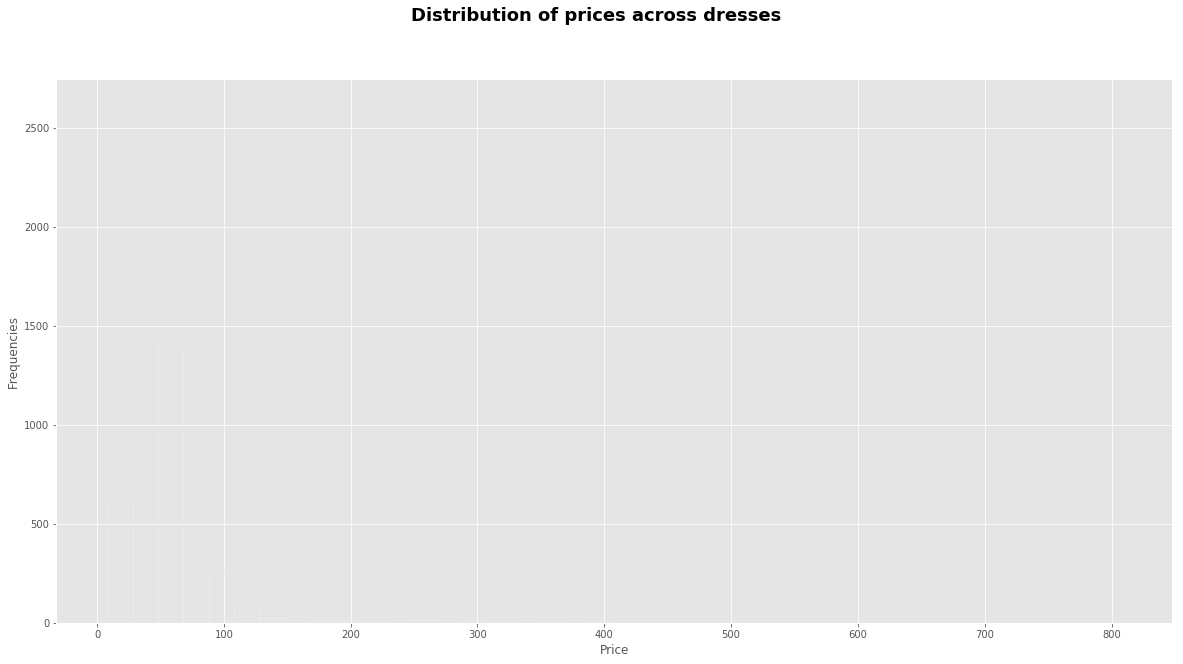

In [30]:
fig = plt.figure()
fig.suptitle('Distribution of prices across dresses', fontsize=18, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_xlabel('Price')
ax.set_ylabel('Frequencies')

d_it = df.loc[(df['item_type'] == 'dresses') & (df['rent_per_week'] < 1000)]['rent_per_week'].dropna().values
#y = d.index.values
#x = d.values
#plt.plot(x, y)
binwidth = 20
mn = np.min(d_it).astype(int)
mx = np.max(d_it).astype(int)
bins = list(range(mn, mx+binwidth, binwidth))
ax.hist(d_it, bins, fill=False, width=20)
d_it = df.loc[(df['item_type'] == 'dresses') & (df['rent_per_week'] > 100) & (df['rent_per_week'] < 1000)]['rent_per_week'].dropna()
d_it.columns